# Netflix Data Analyst Project

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## import data

In [6]:
data = pd.read_csv('netflix1.csv')
data

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV


In [7]:
data.dtypes

show_id         object
type            object
title           object
director        object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
dtype: object

In [8]:
data.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [9]:
data.shape

(8790, 10)

In [10]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

In [11]:
data.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

## Data Cleaning

In [13]:
# find missing value
print(data.isnull().sum())

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64


In [14]:
# drop duplicates
data = data.dropna()

In [15]:
# ckeck for crucial data
data.dropna(subset=['director', 'country','title'],
inplace=True)

In [16]:
# convert 'date_added' to datetime data type
data['date_added'] = pd.to_datetime(data['date_added'])
data.dtypes

show_id                 object
type                    object
title                   object
director                object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
dtype: object

## Exploratory Data Analysis (EDA)

### 1. Content Type Distribution (Movies vs. TV Shows)

In [19]:
## Count the number of Movies and TV Shows
type_counts = data['type'].value_counts()
type_counts

type
Movie      6126
TV Show    2664
Name: count, dtype: int64

Text(0.5, 0.98, 'Total Content on Netflix')

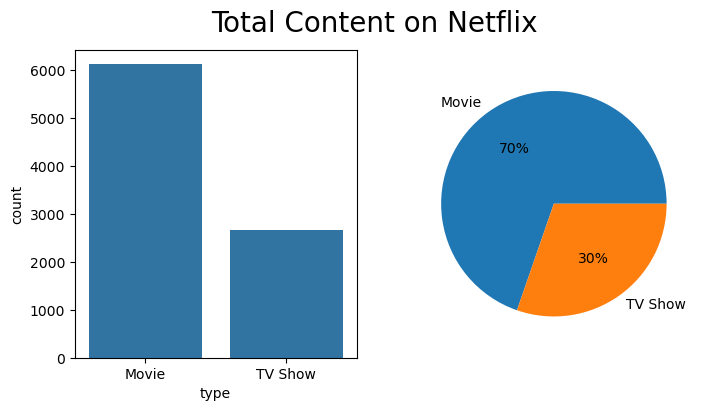

In [20]:
# Plot the distribution
freq=data['type'].value_counts()
fig, axes=plt.subplots(1,2, figsize=(8, 4))
sns.countplot(data, x=data['type'], ax=axes[0])
plt.pie(freq, labels=['Movie', 'TV Show'], autopct='%.0f%%')
plt.suptitle('Total Content on Netflix', fontsize=20)

### 2. Most Common Genres

In [22]:
# Split the 'listed_in' column and count genres
data['genres'] = data['listed_in'].apply(lambda x: x.split(','))
all_genres = sum(data['genres'], [])
genre_counts = pd.Series(all_genres).value_counts().head(10)

In [23]:
genre_counts = (
    data['listed_in']                     # Series of comma‑separated strings
        .str.split(',')                   # → Series of lists
        .explode()                        # one genre per row
        .str.strip()                      # remove leading/trailing spaces
        .value_counts(sort=True)
        .head(10)                          # frequency of each genre
)

print(genre_counts) 

listed_in
International Movies        2752
Dramas                      2426
Comedies                    1674
International TV Shows      1349
Documentaries                869
Action & Adventure           859
TV Dramas                    762
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: count, dtype: int64


C:\Users\suraj\AppData\Local\Temp\ipykernel_13684\1278470742.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index,


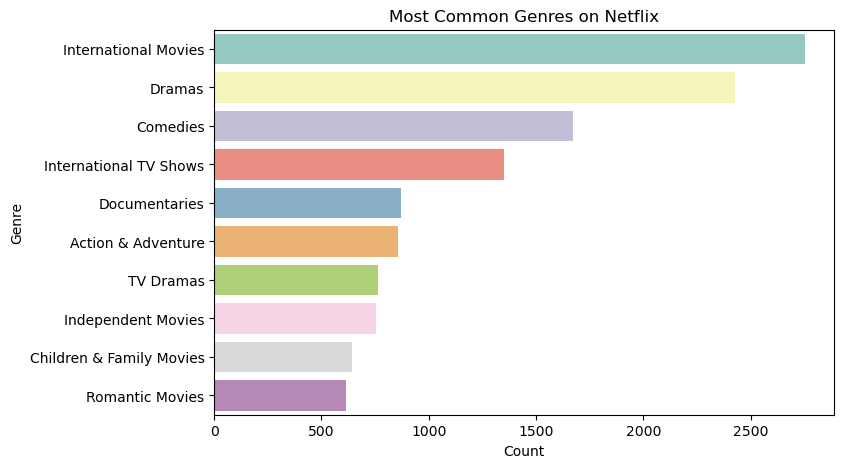

In [24]:
# Plot the most common genres
plt.figure(figsize=(8 ,5))
sns.barplot(x=genre_counts.values, y=genre_counts.index,
palette='Set3')
plt.title('Most Common Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

### 3. Content Added Over Time

In [26]:
# Extract year and month from 'date_added'
data['year_added'] = data['date_added'].dt.year
data['month_added'] = data['date_added'].dt.month

C:\Users\suraj\AppData\Local\Temp\ipykernel_13684\1404816395.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='year_added', data=data, palette='coolwarm')


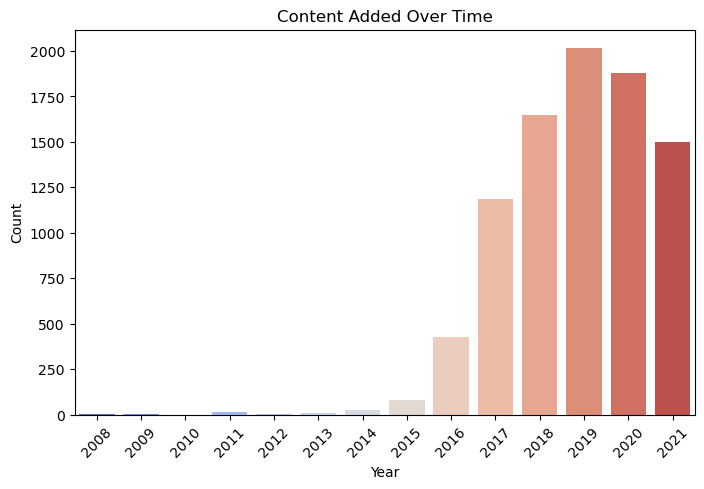

In [27]:
# Plot content added over the years
plt.figure(figsize=(8,5))
sns.countplot(x='year_added', data=data, palette='coolwarm')
plt.title('Content Added Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### 4. Top 10 Directors with the Most Titles

In [29]:
# Count titles by director
top_directors = data['director'].value_counts().head(10)
top_directors

director
Not Given                 2588
Rajiv Chilaka               20
Alastair Fothergill         18
Raúl Campos, Jan Suter      18
Suhas Kadav                 16
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
Martin Scorsese             12
Youssef Chahine             12
Name: count, dtype: int64

In [30]:
top_directors = (
    data.loc[~data['director'].str.strip().str.casefold().eq('not given'), 'director']
        .value_counts()
        .head(10)
)

print(top_directors)

director
Rajiv Chilaka             20
Raúl Campos, Jan Suter    18
Alastair Fothergill       18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Cathy Garcia-Molina       13
Youssef Chahine           12
Jay Chapman               12
Martin Scorsese           12
Name: count, dtype: int64


C:\Users\suraj\AppData\Local\Temp\ipykernel_13684\1762674247.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='year_added', data=data, palette='coolwarm')


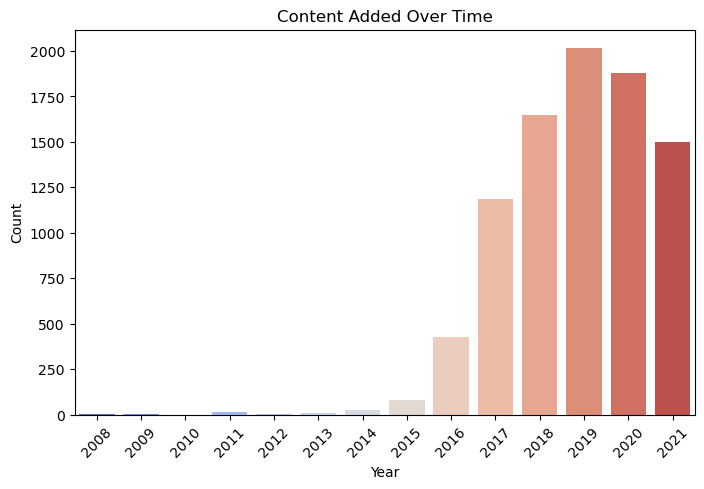

In [31]:
# Plot the most common genres
plt.figure(figsize=(8, 5))
sns.countplot(x='year_added', data=data, palette='coolwarm')
plt.title('Content Added Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

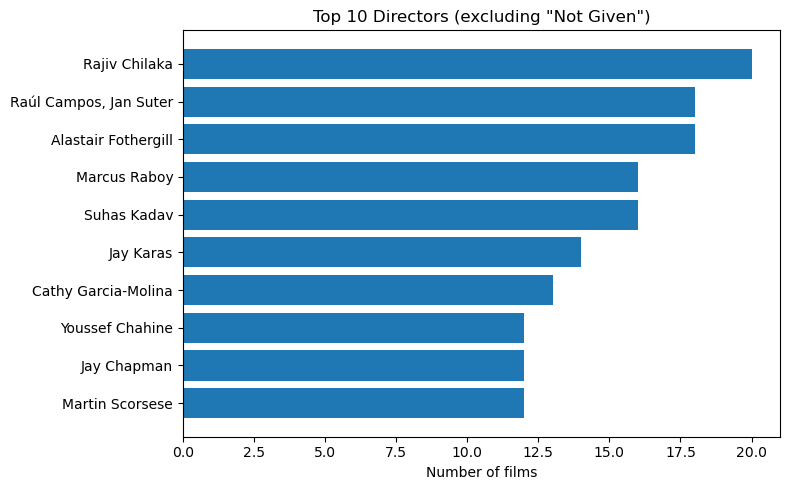

In [32]:
fig, ax = plt.subplots(figsize=(8, 5))

# Because Series.index holds the names and the values are the counts
ax.barh(top_directors.index[::-1],   # reverse so the largest ends up on top
        top_directors.values[::-1])

ax.set_xlabel('Number of films')
ax.set_title('Top 10 Directors (excluding "Not Given")')

# Make labels a bit tidier
plt.tight_layout()
plt.show()


### 5. Word Cloud of Movie Titles

In [34]:
# Generate word cloud
from wordcloud import WordCloud

movie_titles = data[data['type'] == 'Movie']['title']
wordcloud = WordCloud(width=800, height=400,
background_color='black').generate(' '.join(movie_titles))
movie_titles

0                   Dick Johnson Is Dead
3       Confessions of an Invisible Girl
4                                Sankofa
6                           The Starling
7        Motu Patlu in the Game of Zones
                      ...               
8702                            The Bund
8707                    The Darkest Dawn
8716                    The Great Battle
8763         Twisted Trunk, Big Fat Body
8783                Yoko and His Friends
Name: title, Length: 6126, dtype: object

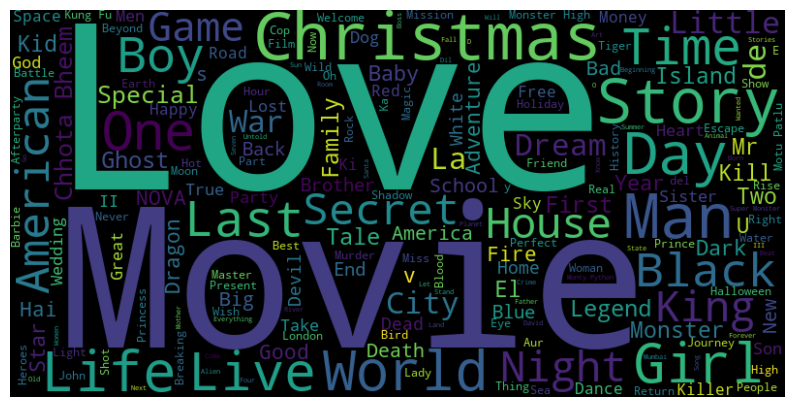

In [35]:
# Plot word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### 6. Rating of Movies

In [37]:
#count rating of movies
rates = data['rating'].value_counts().head(10)
rates

rating
TV-MA    3205
TV-14    2157
TV-PG     861
R         799
PG-13     490
TV-Y7     333
TV-Y      306
PG        287
TV-G      220
NR         79
Name: count, dtype: int64

C:\Users\suraj\AppData\Local\Temp\ipykernel_13684\1315691674.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rates.index, y=rates.values,


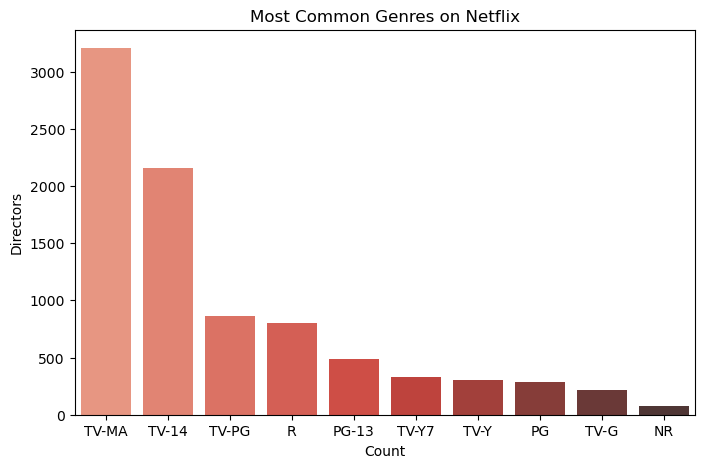

In [38]:
# pot a bargraph for rating
plt.figure(figsize=(8 ,5))
sns.barplot(x=rates.index, y=rates.values,
palette='Reds_d')
plt.title('Most Common Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Directors')
plt.show()

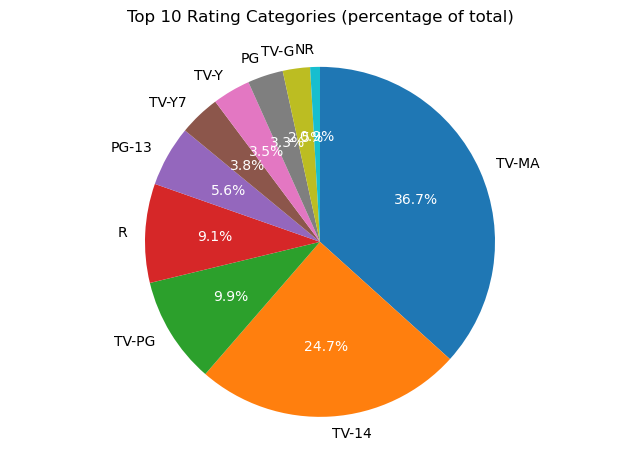

In [39]:
fig, ax = plt.subplots(figsize=(8, 5))

# Plot
patches, texts, autotexts = ax.pie(
    rates.values,
    labels=rates.index,
    autopct='%1.1f%%',      # show percentages with one decimal
    startangle=90,          # start at the top for nicer ordering
    counterclock=False      # keep highest slice first (clockwise)
)

# Improve text contrast
for t in autotexts:
    t.set_fontsize(10)
    t.set_color('white')

ax.set_title('Top 10 Rating Categories (percentage of total)', pad=20)
ax.axis('equal')  # make it a perfect circle

plt.show()


### Top 10 countries with most content on Netflix

In [41]:
top_ten_countries=data['country'].value_counts()
top_ten_countries

country
United States     3240
India             1057
United Kingdom     638
Pakistan           421
Not Given          287
                  ... 
Iran                 1
West Germany         1
Greece               1
Zimbabwe             1
Soviet Union         1
Name: count, Length: 86, dtype: int64

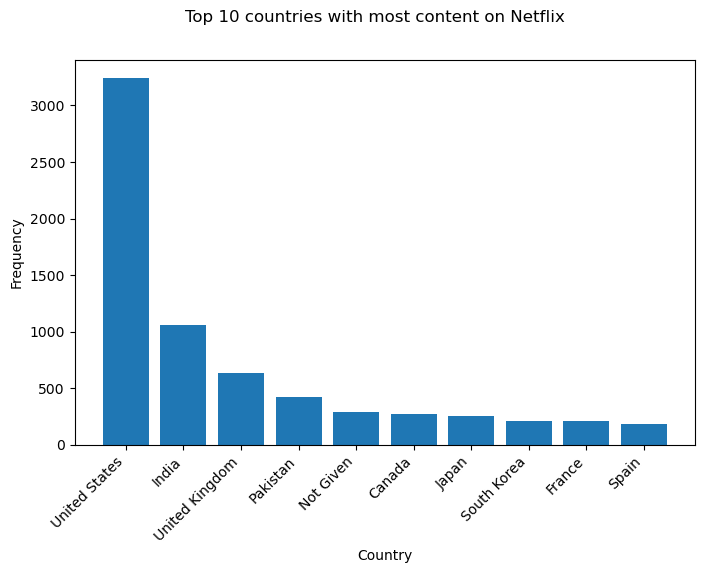

In [42]:
top_ten_countries=data['country'].value_counts().reset_index().sort_values(by='count', ascending=False)[:10]
plt.figure(figsize=(8, 5))
plt.bar(top_ten_countries['country'],
top_ten_countries['count'])
plt.xticks(rotation=45, ha='right')
plt.xlabel("Country")
plt.ylabel("Frequency")
plt.suptitle("Top 10 countries with most content on Netflix")
plt.show()

### Monthly releases of Movies and TV shows on Netflix

In [44]:
data['year']=data['date_added'].dt.year
data['month']=data['date_added'].dt.month
data['day']=data['date_added'].dt.day

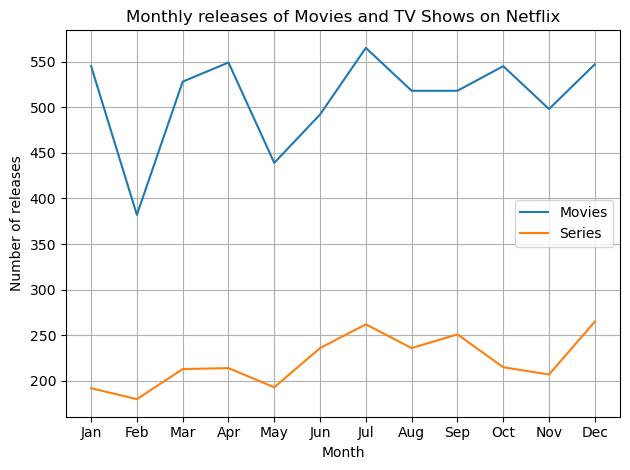

In [45]:
import matplotlib.pyplot as plt

# counts (already calculated)
monthly_movie_release  = data[data['type'] == 'Movie'  ]['month'].value_counts().sort_index()
monthly_series_release = data[data['type'] == 'TV Show']['month'].value_counts().sort_index()

plt.plot(monthly_movie_release.index,  monthly_movie_release.values,  label='Movies')
plt.plot(monthly_series_release.index, monthly_series_release.values, label='Series')

plt.xlabel("Month")
plt.ylabel("Number of releases")
plt.xticks(range(1, 13),
           ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
            'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title("Monthly releases of Movies and TV Shows on Netflix")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Yearly releases of Movies and TV Shows on Netflix

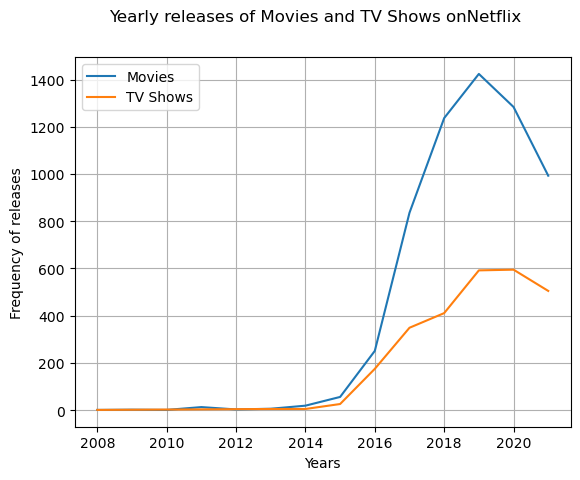

In [47]:
yearly_movie_releases=data[data['type']=='Movie']['year'].value_counts().sort_index()
yearly_series_releases=data[data['type']=='TV Show']['year'].value_counts().sort_index()
plt.plot(yearly_movie_releases.index,
yearly_movie_releases.values, label='Movies')
plt.plot(yearly_series_releases.index,
yearly_series_releases.values, label='TV Shows')
plt.xlabel("Years")
plt.ylabel("Frequency of releases")
plt.grid(True)
plt.suptitle("Yearly releases of Movies and TV Shows onNetflix")
plt.legend()

### Top 10 popular movie genres

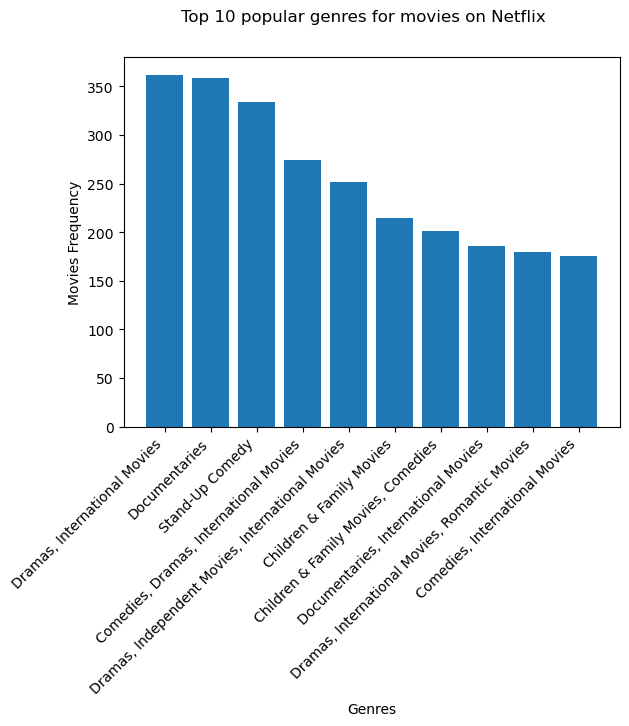

In [49]:
popular_movie_genre=data[data['type']=='Movie'].groupby("listed_in").size().sort_values(ascending=False)[:10]
popular_series_genre=data[data['type']=='TV Show'].groupby("listed_in").size().sort_values(ascending=False)[:10]
plt.bar(popular_movie_genre.index, popular_movie_genre.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Genres")
plt.ylabel("Movies Frequency")
plt.suptitle("Top 10 popular genres for movies on Netflix")
plt.show()

### Top 10 TV Shows genre

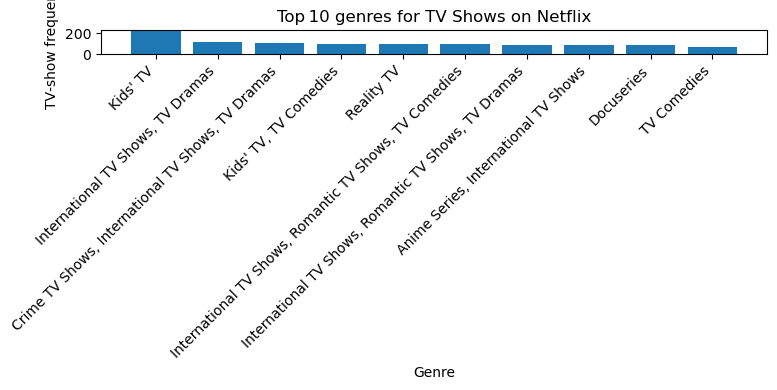

In [51]:
import matplotlib.pyplot as plt

# assume `popular_series_genre` is already the Series with the top 10 counts
plt.figure(figsize=(8, 4))                                   # optional: nicer size
plt.bar(popular_series_genre.index,
        popular_series_genre.values)                         # .values (plural)

plt.xticks(rotation=45, ha='right')
plt.xlabel('Genre')
plt.ylabel('TV‑show frequency')
plt.title('Top 10 genres for TV Shows on Netflix')            # use plt.title
plt.tight_layout()                                           # keep labels inside
plt.show()                                                   # lowercase “s”


In [52]:
data.to_csv('Netflix_Preprocessed_Clean_Data')